In [ ]:
from google.colab import drive
import os
import cv2

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
original_dataset_path = "/content/drive/My Drive/FACE DETECTION/DATASET"
preprocessed_path = "/content/drive/My Drive/FACE DETECTION/face_detection_preprocessed_2"

if not os.path.exists(preprocessed_path):
    os.makedirs(preprocessed_path)

print("Original Folders in Dataset:", os.listdir(original_dataset_path))

Original Folders in Dataset: ['Shoily', 'Munni', 'Akid', 'Rafsan']


In [ ]:
haar_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

print("Original Folders in Dataset:", os.listdir(original_dataset_path))

for folder in os.listdir(original_dataset_path):
    folder_path = os.path.join(original_dataset_path, folder)
    save_folder = os.path.join(preprocessed_path, folder)

    if not os.path.exists(save_folder):
        os.makedirs(save_folder)

    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)

        if img is not None:
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            faces = haar_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

            if len(faces) == 0:
                print(f"No faces detected in {img_name}")


            for (x, y, w, h) in faces:
                face = gray[y:y + h, x:x + w]
                face_resized = cv2.resize(face, (224, 224))
                save_path = os.path.join(save_folder, img_name)
                cv2.imwrite(save_path, face_resized)

                print(f"Saved {img_name} in {save_folder}")
        else:
            print(f"Failed to read image {img_name}")

print("Preprocessed Folders in Dataset:", os.listdir(preprocessed_path))

Original Folders in Dataset: ['Shoily', 'Munni', 'Akid', 'Rafsan']
Saved frame_0982.jpg in /content/drive/My Drive/FACE DETECTION/face_detection_preprocessed_2/Shoily
Saved frame_0972.jpg in /content/drive/My Drive/FACE DETECTION/face_detection_preprocessed_2/Shoily
Saved frame_0976.jpg in /content/drive/My Drive/FACE DETECTION/face_detection_preprocessed_2/Shoily
Saved frame_0975.jpg in /content/drive/My Drive/FACE DETECTION/face_detection_preprocessed_2/Shoily
Saved frame_0968.jpg in /content/drive/My Drive/FACE DETECTION/face_detection_preprocessed_2/Shoily
Saved frame_0990.jpg in /content/drive/My Drive/FACE DETECTION/face_detection_preprocessed_2/Shoily
Saved frame_1000.jpg in /content/drive/My Drive/FACE DETECTION/face_detection_preprocessed_2/Shoily
Saved frame_0977.jpg in /content/drive/My Drive/FACE DETECTION/face_detection_preprocessed_2/Shoily
Saved frame_0971.jpg in /content/drive/My Drive/FACE DETECTION/face_detection_preprocessed_2/Shoily
Saved frame_0979.jpg in /content/

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import optimizers


img_height, img_width = 224, 224
batch_size = 64
learning_rate = 0.0001


datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    preprocessed_path,
    target_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_data = datagen.flow_from_directory(
    preprocessed_path,
    target_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(len(train_data.class_indices), activation='softmax')
])


model.compile(
    optimizer=optimizers.Adam(learning_rate=learning_rate),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ModelCheckpoint('best_model.keras', save_best_only=True)
]

# Train the Model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20,
    callbacks=callbacks
)



Found 3066 images belonging to 4 classes.
Found 765 images belonging to 4 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


48/48 ━━━━━━━━━━━━━━━━━━━━ 28s 409ms/step - accuracy: 0.3446 - loss: 1.3000 - val_accuracy: 0.7660 - val_loss: 1.0555
Epoch 2/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 13s 248ms/step - accuracy: 0.6113 - loss: 0.9441 - val_accuracy: 0.7529 - val_loss: 0.6288
Epoch 3/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 14s 251ms/step - accuracy: 0.7756 - loss: 0.6084 - val_accuracy: 0.9569 - val_loss: 0.3685
Epoch 4/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 20s 247ms/step - accuracy: 0.8704 - loss: 0.4260 - val_accuracy: 0.9621 - val_loss: 0.2529
Epoch 5/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 13s 249ms/step - accuracy: 0.9035 - loss: 0.3110 - val_accuracy: 0.9582 - val_loss: 0.1825
Epoch 6/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 13s 249ms/step - accuracy: 0.9354 - loss: 0.2322 - val_accuracy: 0.9608 - val_loss: 0.1590
Epoch 7/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 13s 245ms/step - accuracy: 0.9391 - loss: 0.1909 - val_accuracy: 0.9529 - val_loss: 0.1632
Epoch 8/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 21s 250ms/step - accuracy: 0.9464 - loss: 0.1733 - val_accuracy: 0.960

In [ ]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 16)        │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 43264)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       2,768,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,377,550 (31.96 MB)

 Trainable params: 2,792,516 (10.65 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,585,034 (21.31 MB)

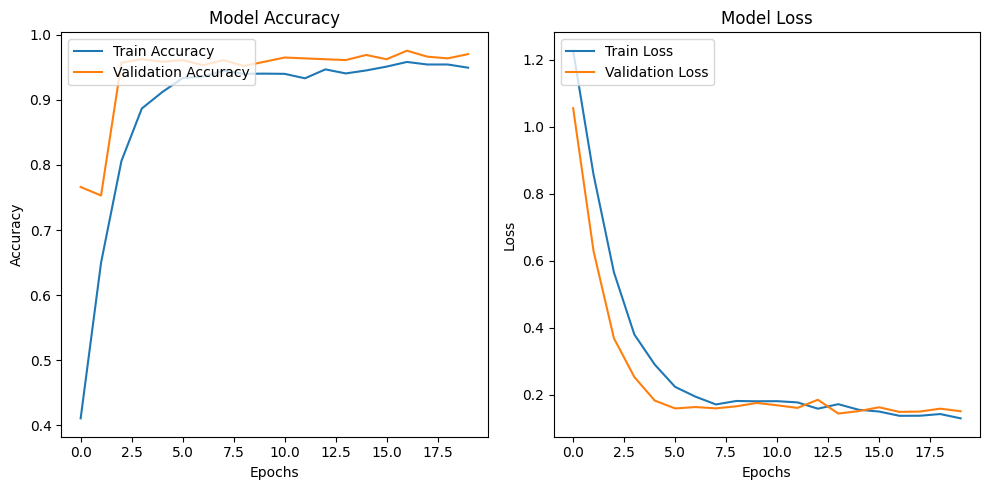

In [ ]:
plt.figure(figsize=(10, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 200ms/step - accuracy: 0.9585 - loss: 0.1303

Validation Accuracy: 96.08%
Validation Loss: 0.1437
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step  


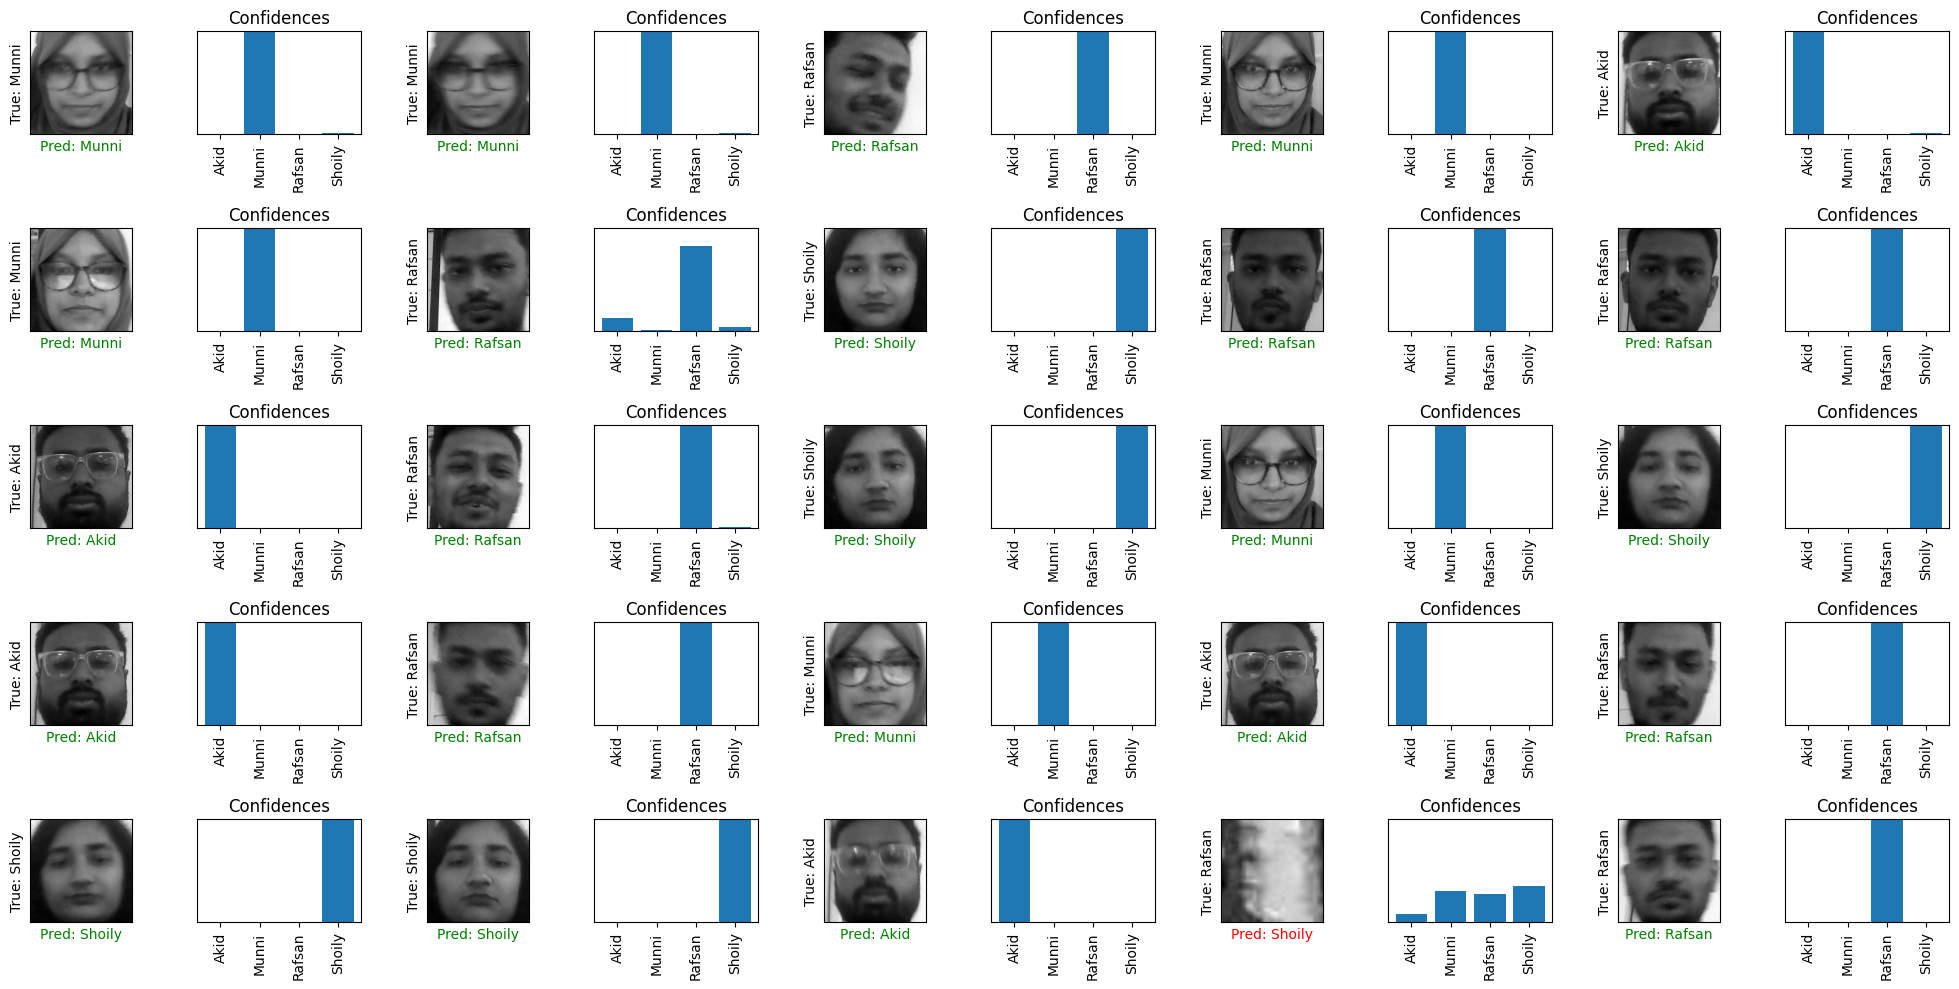

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


val_loss, val_acc = model.evaluate(val_data, verbose=1)


print(f"\nValidation Accuracy: {val_acc * 100:.2f}%")
print(f"Validation Loss: {val_loss:.4f}")


X_test, Y_test = next(val_data)
predictions = model.predict(X_test)


class_names = list(val_data.class_indices.keys())

rows, cols = 5, 5
plt.figure(figsize=(20, 10))

for i in range(rows * cols):
    if i >= len(X_test):
        break


    plt.subplot(rows, 2 * cols, 2 * i + 1)
    img = X_test[i].squeeze() * 255
    img = np.clip(img, 0, 255).astype('uint8')
    plt.imshow(img, cmap='gray')
    plt.xticks([])
    plt.yticks([])

    true_label = np.argmax(Y_test[i])
    pred_label = np.argmax(predictions[i])
    plt.ylabel(f"True: {class_names[true_label]}")

    if true_label == pred_label:
        plt.xlabel(f"Pred: {class_names[pred_label]}", color='g')
    else:
        plt.xlabel(f"Pred: {class_names[pred_label]}", color='r')

    plt.subplot(rows, 2 * cols, 2 * i + 2)
    plt.bar(range(len(class_names)), predictions[i])
    plt.xticks(range(len(class_names)), class_names, rotation=90)
    plt.yticks([])
    plt.ylim([0, 1])
    plt.title("Confidences")

plt.tight_layout()
plt.show()


In [ ]:
model.save('/content/drive/My Drive/FACE DETECTION/Final_Model.keras')

model.save('/content/drive/My Drive/FACE DETECTION/Final_Model.h5', save_format='h5')

print("Model saved successfully!")


Model saved successfully!
